# Pattern Recognition Assignment 2
Lioupis Theodoros 9733
Stavrianidou Evgenia 9686

## Import Libraries

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import math

## Part A

### Question 1

The estimations of θ1 are: [0.0564138790948398, 0.773097881995519, 2.59979452369116]
The estimations of θ2 are: [-3.16145642222340]
For θ1 we keep the value 2.59979452369116
For θ2 we keep the value -3.16145642222340
Comments:
Figure 1: We see that the ln(p(D1|θ)) has two local maximums and one local minimum. We have maximum likelihood for Θ1 = 2.600 as shown in the fugure.
Figure 2: We see that the ln(p(D2|θ)) has one local maximum for Θ2 = -3.161 where we also have the maximum likelihood.


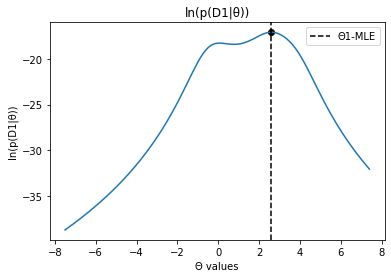

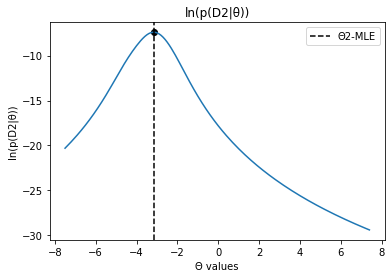

In [30]:
#Defining p(x|θ) as a function with θ as a symbolic variable
thita = sym.Symbol('thita')
def pdf_x_thita(x):
  return (1/np.pi)/(1+(x-thita)**2)

#Defining p(D|θ) using the p(x|θ) function that we made
def pdf_D_thita(D): #check if this is a PDF
  n = len(D)
  product = pdf_x_thita(D[0]) #calculating P(Xn|θ) for n = 1
  for i in range(1,n):
    product = product * pdf_x_thita(D[i]) #calculating the product 
  return product #the function returns the product of P(Xn|θ) for n = [1, length of D]

#A function to calculate the dL/dΘ where L(θ) = ln(p(D|θ))
def dl_dthita(pdf):
  l_pdf = sym.log(pdf) #comment
  return sym.diff(l_pdf,thita) #comment

#Our sample X consists of D1(no stress) and D2(stress) samples
D1 = [2.8,-0.4,-0.8,2.3,-0.3,3.6,4.1]
D2 = [-4.5,-3.4,-3.1,-3.0,-2.3]

#calculating p(D|θ) for D1 and D2
pdf_D_thita_D1 = pdf_D_thita(D1)
pdf_D_thita_D2 = pdf_D_thita(D2)

#calculating dl/dθ for D1 and D2 where L(θ) = ln(p(D|θ))
dl_dthita_D1 = dl_dthita(pdf_D_thita_D1)
dl_dthita_D2 = dl_dthita(pdf_D_thita_D2)

#calculating the thita for dl/dθ = 0 -> MLE
thita1 = sym.solveset(dl_dthita_D1,thita)
thita2 = sym.solveset(dl_dthita_D2,thita)
#keep only the real solutions (not the complex)
thita1 = [n for n in thita1.args if n.is_real]
thita2 = [n for n in thita2.args if n.is_real]
print('The estimations of θ1 are:',thita1)
print('The estimations of θ2 are:',thita2)

#calculating likelihood for thita1 estimations
ln_pdf_D_thita_D1 = sym.log(pdf_D_thita_D1) #ln(p(D1|θ))
res_ln_pdf_D_thita_D1 = []
for i in range(0,len(thita1)):
  res_ln_pdf_D_thita_D1.append(ln_pdf_D_thita_D1.subs(thita,thita1[i]))
#calculating likelihood for thita2 estimations
ln_pdf_D_thita_D2 = sym.log(pdf_D_thita_D2) #ln(p(D1|θ))
res_ln_pdf_D_thita_D2 = []
for i in range(0,len(thita2)):
  res_ln_pdf_D_thita_D2.append(ln_pdf_D_thita_D2.subs(thita,thita2[i]))
#keeping the thita where I have the maximum likelihood
thita1_max_index = res_ln_pdf_D_thita_D1.index(max(res_ln_pdf_D_thita_D1))
thita2_max_index = res_ln_pdf_D_thita_D2.index(max(res_ln_pdf_D_thita_D2))
thita1 = thita1[thita1_max_index]
thita2 = thita2[thita2_max_index]
print('For θ1 we keep the value',thita1)
print('For θ2 we keep the value',thita2)

#comments on the 2 plots
print('Comments:\nFigure 1: We see that the ln(p(D1|θ)) has two local maximums and one local minimum. We have maximum likelihood for Θ1 =',round(thita1,3),'as shown in the fugure.')
print('Figure 2: We see that the ln(p(D2|θ)) has one local maximum for Θ2 =',round(thita2,3),'where we also have the maximum likelihood.')

#creating thita values
start = -7.5
stop = 7.5
step = 0.1
thita_values = np.arange(start,stop,step)
#plotting ln(p(D1|θ))
ln_pdf_D_thita_D1 = sym.log(pdf_D_thita_D1) #ln(p(D1|θ))
res_ln_pdf_D_thita_D1 = []
for i in range(0,len(thita_values)):
  res_ln_pdf_D_thita_D1.append(ln_pdf_D_thita_D1.subs(thita,thita_values[i]))
plt.figure(1)
plt.title('ln(p(D1|θ))')
plt.plot(thita_values,res_ln_pdf_D_thita_D1)
plt.axvline(x = thita1,linestyle = '--',label = 'Θ1-MLE',color='black')
plt.scatter(thita1, max(res_ln_pdf_D_thita_D1),color='black')
plt.legend()
plt.xlabel('Θ values')
plt.ylabel('ln(p(D1|θ))')
plt.show()
#plotting log(p(D2|θ))
ln_pdf_D_thita_D2 = sym.log(pdf_D_thita_D2) #ln(p(D2|θ))
res_ln_pdf_D_thita_D2 = []
for i in range(0,len(thita_values)):
  res_ln_pdf_D_thita_D2.append(ln_pdf_D_thita_D2.subs(thita,thita_values[i]))
plt.figure(2)
plt.title('ln(p(D2|θ))')
plt.plot(thita_values,res_ln_pdf_D_thita_D2)
plt.axvline(x = thita2,linestyle = '--',label = 'Θ2-MLE',color='black')
plt.scatter(thita2, max(res_ln_pdf_D_thita_D2),color='black')
plt.legend()
plt.xlabel('Θ values')
plt.ylabel('ln(p(D2|θ))')
plt.show()

###Question 2

Value of g(x) for D1 elements: [3.8955516184169454, 0.18874977808193938, -0.3104345708927525, 3.678814965826846, 0.312716912117343, 3.487233974592281, 3.1415758031458063]
Value of g(x) for D2 elements: [-2.5766533751838767, -3.219036064033761, -3.1709349275545677, -3.114645544544944, -2.327627595928173]
We observe that...


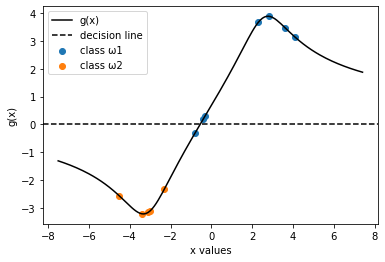

In [31]:
#a function to calculate the value of g(x) for some x_values and for specific θ1,θ2
def gx(x_values,thita1,thita2):
  p_w1 = 7/12 #apriori probability P(w1), 7 out of 12 said they didn't feel any stress
  p_w2 = 5/12 #apriori probability P(w2), 5 out of 12 said they felt stress
  pdf_x_thita1 = []
  pdf_x_thita2 = []
  gx = []
  for i in range(0,len(x_values)):
    pdf_x_thita1.append(pdf_x_thita(x_values[i]).subs(thita,thita1)) #P(x|θ1)
    pdf_x_thita2.append(pdf_x_thita(x_values[i]).subs(thita,thita2)) #P(x|θ2)
    gx.append(math.log(pdf_x_thita1[i]) - math.log(pdf_x_thita2[i]) + math.log(7/12) - math.log(5/12)) # g(x) = log(P(x|θ1)) - log(P(x|θ2)) + log(P(w1)) - log(P(w2))
  return gx
  
#creating some x_values
start = -7.5
stop = 7.5
step = 0.1
x_values = np.arange(start,stop,step)
#calculating g(x)
gx_total = gx(x_values,thita1,thita2) #for x_values
gx_D1 = gx(D1,thita1,thita2) #for D1
gx_D2 = gx(D2,thita1,thita2) #for D2
#
print('Value of g(x) for D1 elements:',gx_D1)
print('Value of g(x) for D2 elements:',gx_D2)
print('We observe that...') #TBD!!!!!!!!!!!!!!!!!!!!!!!!!
#plotting g(x)
plt.figure(3)
plt.plot(x_values,gx_total,label = 'g(x)',color = 'black')
plt.scatter(D1,gx_D1,marker = 'o',label = 'class ω1')
plt.scatter(D2,gx_D2,marker = 'o',label = 'class ω2')
plt.axhline(y = 0,linestyle = '--',label = 'decision line',color='black') #TBD!!!!!!!!!!!!!!!!!!!!!!!!!!!!
plt.legend()
plt.xlabel('x values')
plt.ylabel('g(x)')
plt.show()
#TBD:
#DECISION RULE!!!!!!!!!!!!!!!!!!!!!

##Part B

###Question 1

###Question 2